In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.express as px

In [45]:
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()
diab_df = diabetes.copy()

dupl_columns = list(diab_df.columns)
#dupl_columns.remove('id')
mask = diab_df.duplicated(subset=dupl_columns)
diab_duplicates = diab_df[mask]
print(f'Число найденных дубликатов: {diab_duplicates.shape[0]}')

diab_dedupped = diab_df.drop_duplicates(dupl_columns)
print(f'Результирующее число записей: {diab_dedupped.shape[0]}')

Число найденных дубликатов: 10
Результирующее число записей: 768


In [46]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in diab_dedupped.columns:
    #наибольшая относительная частота в признаке
    top_freq = diab_dedupped[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diab_dedupped[col].nunique() / diab_dedupped[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

Gender: 100.0% одинаковых значений


In [47]:
information_diab_dedupped = diab_dedupped.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {information_diab_dedupped.shape[1]}')
print(information_diab_dedupped)

Результирующее число признаков: 9
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
0              6       98             58             33      190  34.0  \
1              2      112             75             32        0  35.7   
2              2      108             64              0        0  30.8   
3              8      107             80              0        0  24.6   
4              7      136             90              0        0  29.9   
..           ...      ...            ...            ...      ...   ...   
763            5      139             64             35      140  28.6   
764            1       96            122              0        0  22.4   
765           10      101             86             37        0  45.6   
766            0      141              0              0        0  42.4   
767            0      125             96              0        0  22.5   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.430  

In [48]:
def IsNullValue(val):
    if val==0:
        return np.nan
    else:
        return val
    
    
#for col in information_diab_dedupped.columns:
    
#    if col == 'Outcome':
#        print(col)
#        continue
information_diab_dedupped['Glucose'] = information_diab_dedupped['Glucose'].apply(IsNullValue)
information_diab_dedupped['BloodPressure'] = information_diab_dedupped['BloodPressure'].apply(IsNullValue) 
information_diab_dedupped['SkinThickness'] = information_diab_dedupped['SkinThickness'].apply(IsNullValue)
information_diab_dedupped['Insulin'] = information_diab_dedupped['Insulin'].apply(IsNullValue)    
information_diab_dedupped['BMI'] = information_diab_dedupped['BMI'].apply(IsNullValue)  
#print(information_diab_dedupped['Insulin'].isnull().value_counts(normalize=True))    
print(information_diab_dedupped)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
0              6     98.0           58.0           33.0    190.0  34.0  \
1              2    112.0           75.0           32.0      NaN  35.7   
2              2    108.0           64.0            NaN      NaN  30.8   
3              8    107.0           80.0            NaN      NaN  24.6   
4              7    136.0           90.0            NaN      NaN  29.9   
..           ...      ...            ...            ...      ...   ...   
763            5    139.0           64.0           35.0    140.0  28.6   
764            1     96.0          122.0            NaN      NaN  22.4   
765           10    101.0           86.0           37.0      NaN  45.6   
766            0    141.0            NaN            NaN      NaN  42.4   
767            0    125.0           96.0            NaN      NaN  22.5   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.430   43        0  
1                  

In [49]:
cols_null_percent = information_diab_dedupped.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
print(cols_with_null)
#information_diab_dedupped.drop('Outcome',axis=1)


#print(thresh, information_diab_dedupped.shape[0])

drop_data = information_diab_dedupped.copy()
thresh = drop_data.shape[0]*0.7
drop_data = drop_data.dropna(thresh=thresh,axis=1)
print(drop_data.shape[1])

print(drop_data.isnull().mean())

Insulin          48.697917
SkinThickness    29.557292
BloodPressure     4.557292
BMI               1.432292
Glucose           0.651042
dtype: float64
8
Pregnancies                 0.000000
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64


In [50]:
m = drop_data.shape[1]
drop_data = drop_data.dropna(thresh=m-2,axis=0)
print(drop_data.shape[0])

761


In [51]:
fill_data = drop_data.copy()
values = {
    'Glucose': fill_data['Glucose'].median(),
    'Glucose': fill_data['BloodPressure'].median(),
    'Glucose': fill_data['SkinThickness'].median(),
    'Glucose': fill_data['BMI'].median()
}

fill_data = fill_data.fillna(values)

print(fill_data.mean())

Pregnancies                   3.840999
Glucose                     121.343627
BloodPressure                72.405184
SkinThickness                29.153420
BMI                          32.457464
DiabetesPedigreeFunction      0.474126
Age                          33.323259
Outcome                       0.350854
dtype: float64


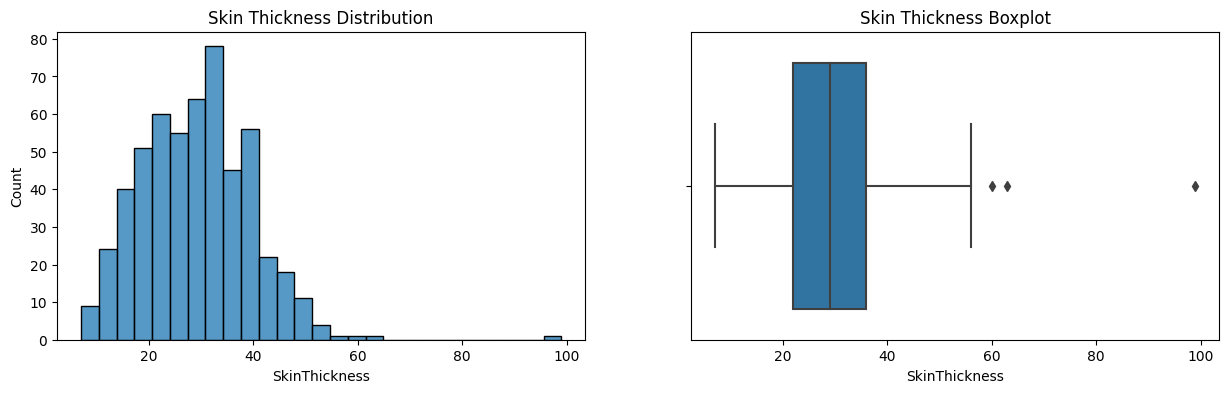

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=fill_data, x='SkinThickness', ax=axes[0]);
histplot.set_title('Skin Thickness Distribution');
boxplot = sns.boxplot(data=fill_data, x='SkinThickness', ax=axes[1]);
boxplot.set_title('Skin Thickness Boxplot');

In [70]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned


In [71]:
outliers, cleaned = outliers_iqr_mod(fill_data, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 3
Результирующее число записей: 538


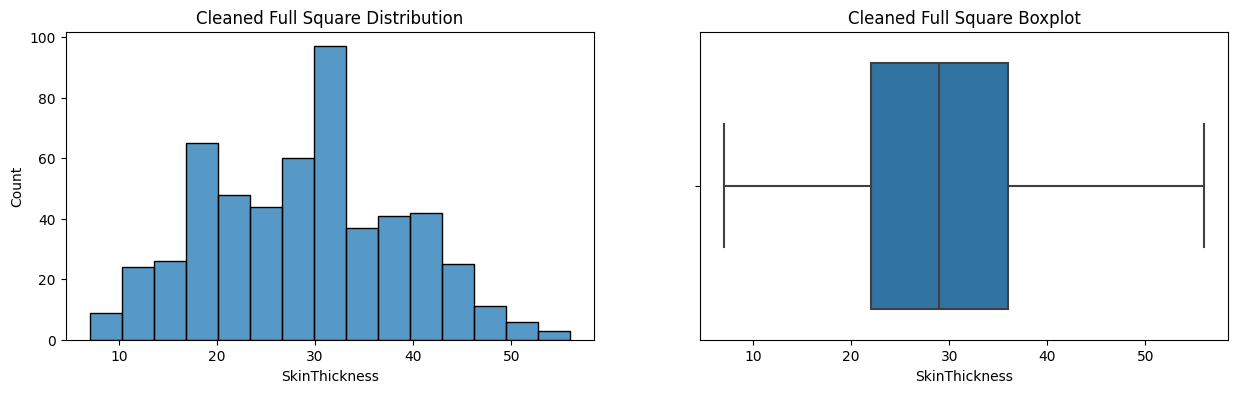

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='SkinThickness', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='SkinThickness', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');